In [189]:
from PIL import Image
import numpy as np

#Import image
impatch = "Tol4-1 high.tiff"
im = Image.open(impatch)

#Set to array
imarray = np.array(im)

(1024, 1024, 3)


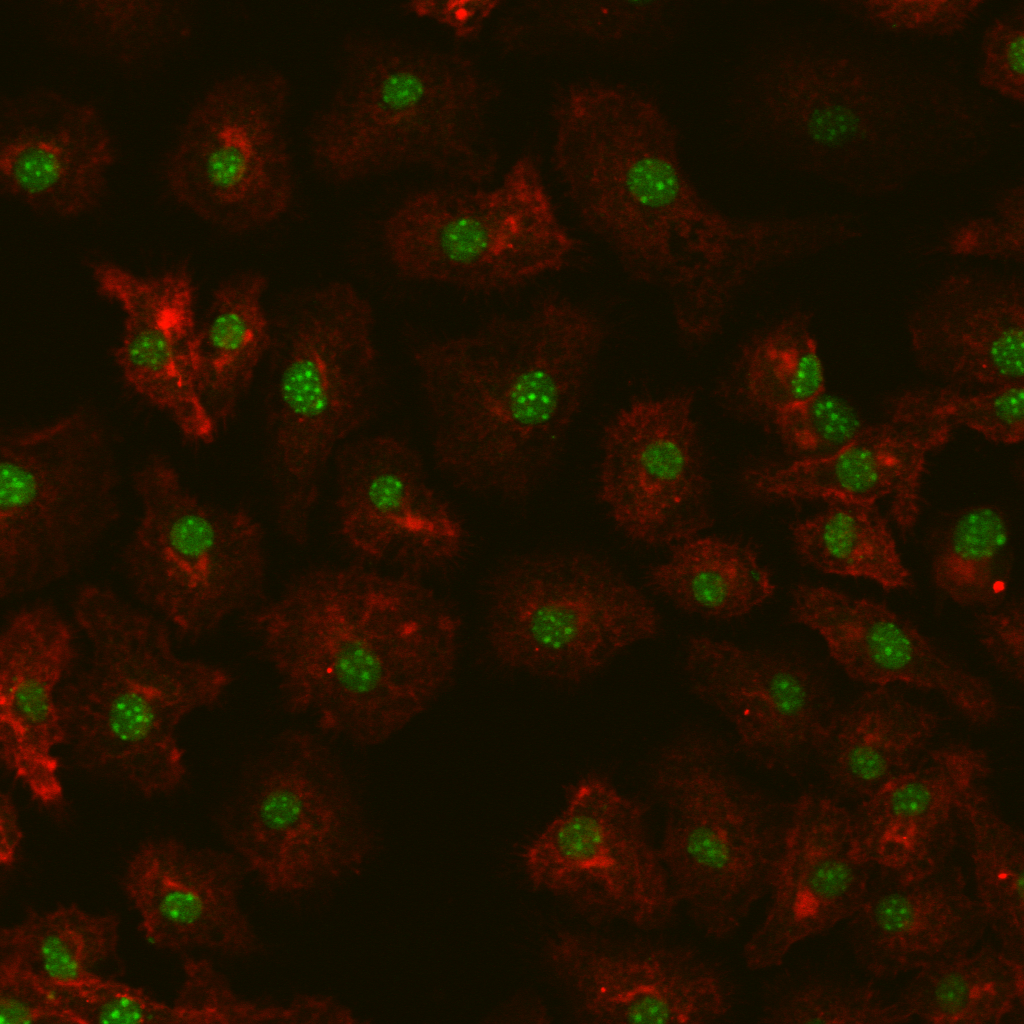

In [190]:
#Show array shape&image
print(imarray.shape)
Image.fromarray(imarray)

65.41690352335496
(1024, 2050, 3)


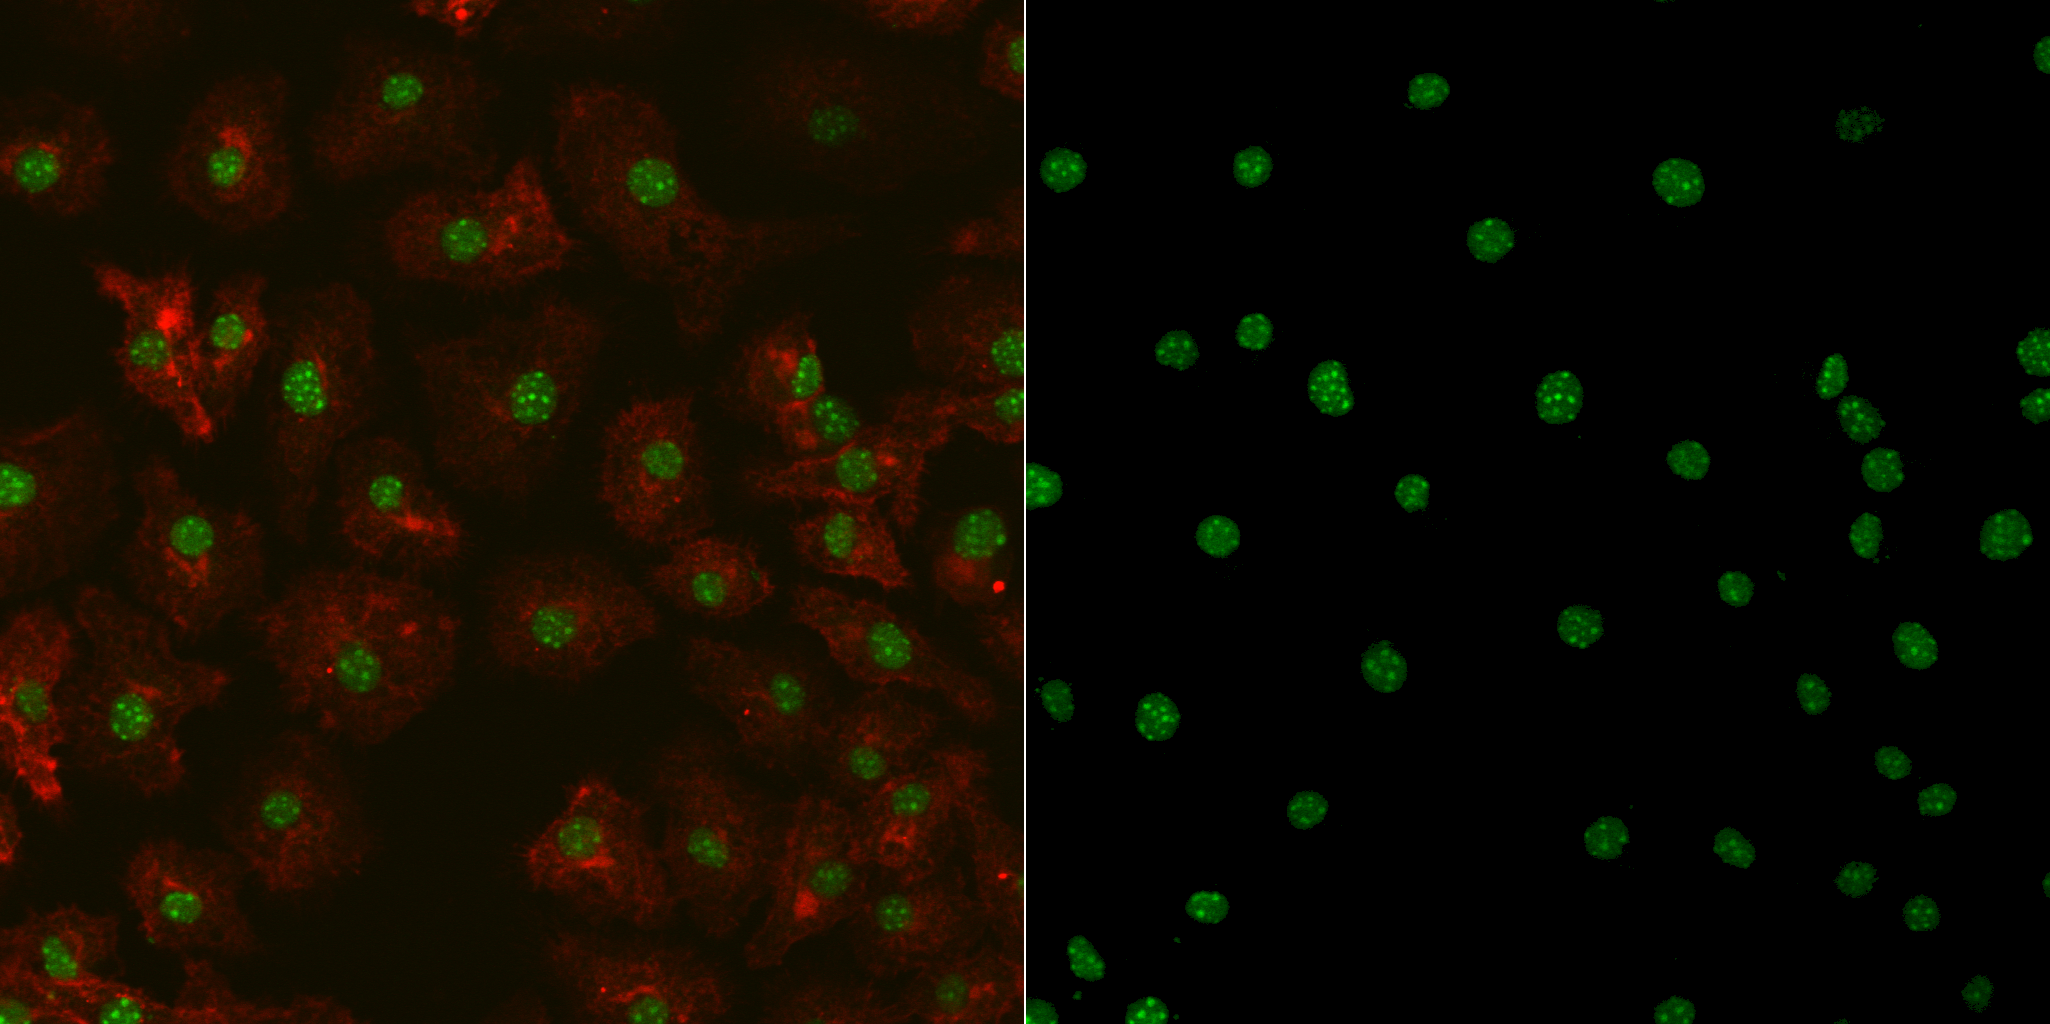

In [191]:
#Delete R B color
gimarray = imarray.copy()
gimarray[:, :, 0] = 0
gimarray[:, :, 2] = 0

#Fillter noise
gimarray[gimarray < 30] = 0

#Split G color array
gareaimarray = gimarray[:, :, 1]

#Calculate intentsive of green area
gareaimarray = gareaimarray[gareaimarray > 0]
print(gareaimarray.mean())

#combine 2 image
imarray = np.concatenate((imarray, np.full((1024, 2, 3), 255, dtype="uint8"), gimarray), axis=1)
print(imarray.shape)
Image.fromarray(imarray)

In [192]:
#Save image
Image.fromarray(imarray).save("Split" + impatch[:-5] + ".jpg")

In [194]:
from PIL import ImageFont
from PIL import ImageDraw

#Draw text in photo
img = Image.fromarray(imarray)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('Montserrat-Black.ttf', 20)
draw.text((3, 3),"Sample",(255,255,255),font=font)

img.save('sample-out.jpg')

TypeError: argument of type 'numpy.float64' is not iterable